# Task 3: Experience Analysis

In [1]:
import os
import sys

# path of the module files
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
from utils import *
from load_db import load_data_from_postgres

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Define your SQL query
query = "SELECT * FROM xdr_data"  # Replace with your actual table name

# Load data from PostgreSQL
df = load_data_from_postgres(query)

# Display the first few rows of the dataframe
if df is not None:
    print("Successfully loaded the data")
else:
    print("Failed to load data.")


Successfully loaded the data


In [3]:
# dataframe for experience analytics
experience = df[['MSISDN/Number','Handset Type','Dur. (ms)','Avg RTT DL (ms)','Avg RTT UL (ms)','Avg Bearer TP DL (kbps)','Avg Bearer TP UL (kbps)','TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)']]

In [4]:
experience.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   MSISDN/Number                148935 non-null  float64
 1   Handset Type                 149429 non-null  object 
 2   Dur. (ms)                    150000 non-null  float64
 3   Avg RTT DL (ms)              122172 non-null  float64
 4   Avg RTT UL (ms)              122189 non-null  float64
 5   Avg Bearer TP DL (kbps)      150000 non-null  float64
 6   Avg Bearer TP UL (kbps)      150000 non-null  float64
 7   TCP DL Retrans. Vol (Bytes)  61855 non-null   float64
 8   TCP UL Retrans. Vol (Bytes)  53352 non-null   float64
dtypes: float64(8), object(1)
memory usage: 10.3+ MB


- Null value of MSISDN/Number and Handset Type is hard to fill if external infomartion aren't found therefore for this analysis, the best approach is to remove them.

In [5]:
# removing rows with null handset type
experience.dropna(subset=['MSISDN/Number'], inplace = True)
experience = experience[(experience['Handset Type'] != 'undefined')]

# check
experience.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140004 entries, 0 to 149999
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   MSISDN/Number                140004 non-null  float64
 1   Handset Type                 140004 non-null  object 
 2   Dur. (ms)                    140004 non-null  float64
 3   Avg RTT DL (ms)              116441 non-null  float64
 4   Avg RTT UL (ms)              116458 non-null  float64
 5   Avg Bearer TP DL (kbps)      140004 non-null  float64
 6   Avg Bearer TP UL (kbps)      140004 non-null  float64
 7   TCP DL Retrans. Vol (Bytes)  58587 non-null   float64
 8   TCP UL Retrans. Vol (Bytes)  50722 non-null   float64
dtypes: float64(8), object(1)
memory usage: 10.7+ MB


In [6]:
# change customers number to string to view the whole numbers
experience['MSISDN/Number'] = experience['MSISDN/Number'].astype(str)
experience.dtypes

MSISDN/Number                   object
Handset Type                    object
Dur. (ms)                      float64
Avg RTT DL (ms)                float64
Avg RTT UL (ms)                float64
Avg Bearer TP DL (kbps)        float64
Avg Bearer TP UL (kbps)        float64
TCP DL Retrans. Vol (Bytes)    float64
TCP UL Retrans. Vol (Bytes)    float64
dtype: object

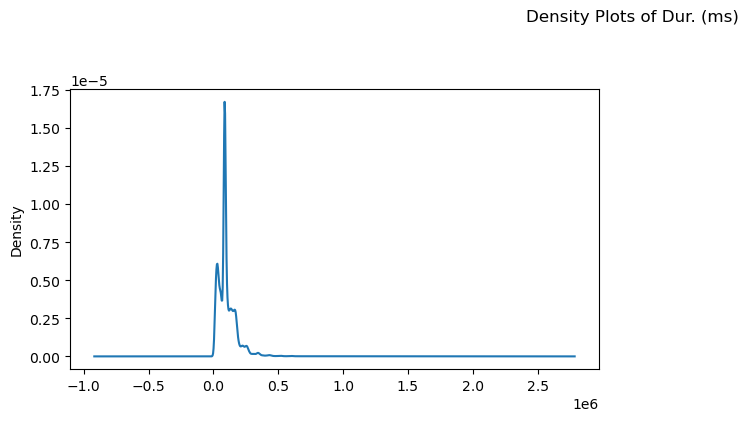

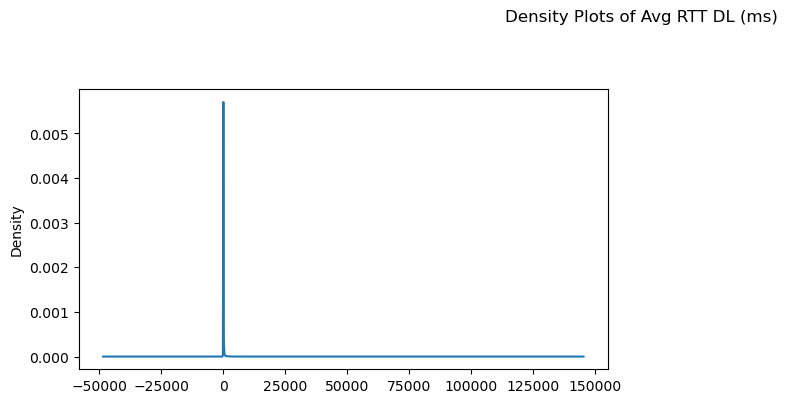

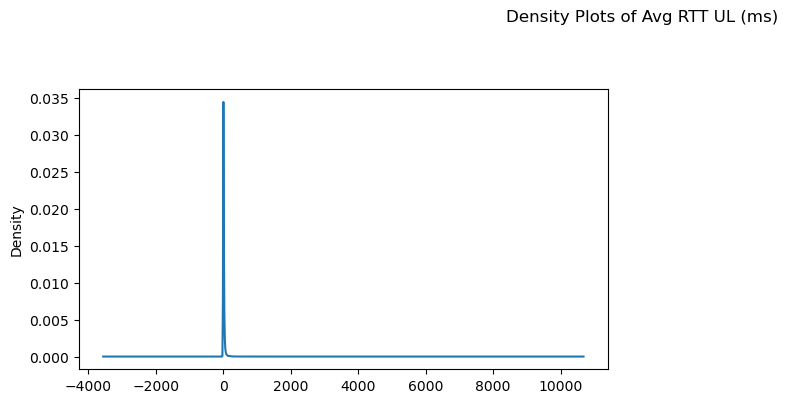

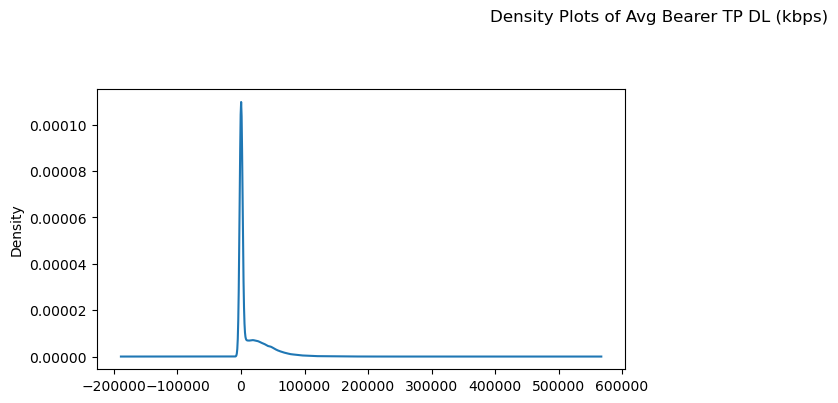

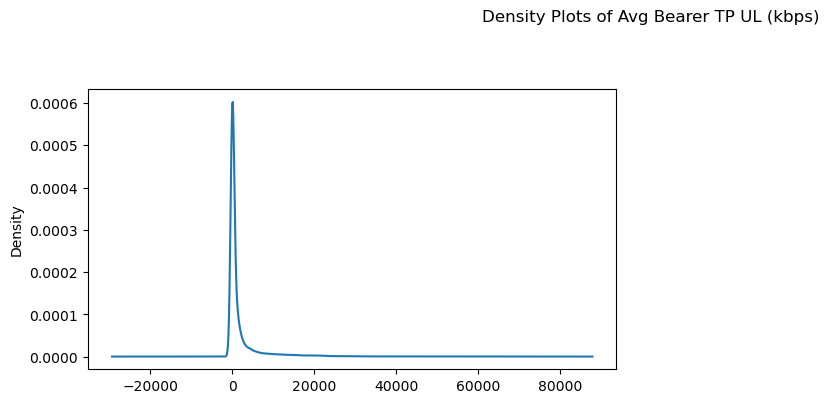

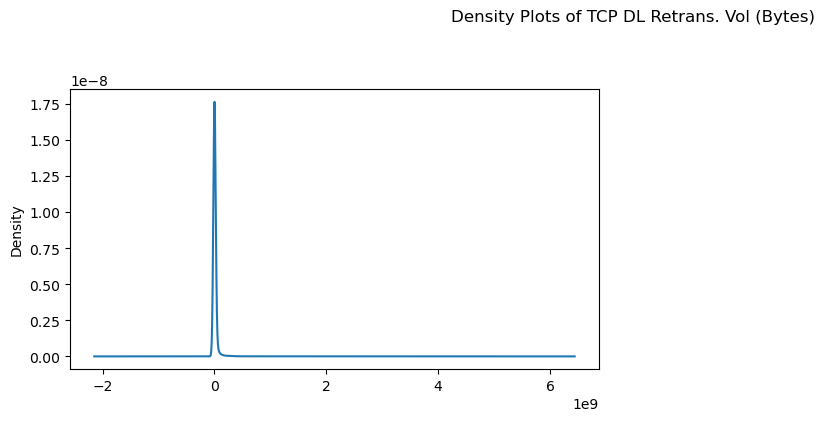

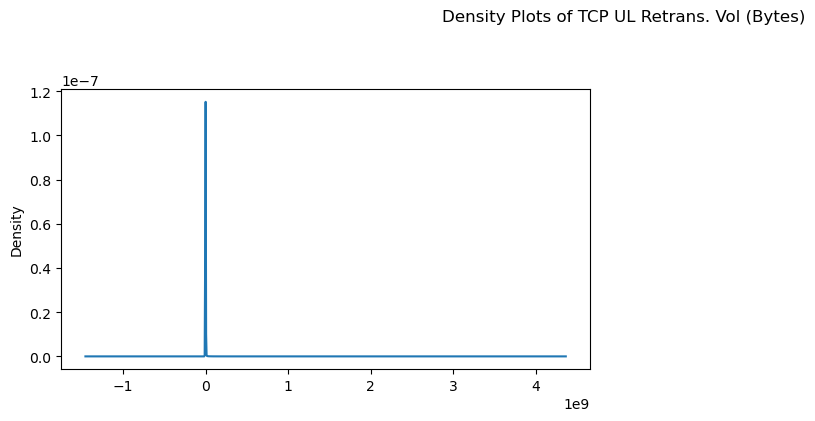

In [7]:
# check the distribution of the other columns with null values
columns = experience.select_dtypes(include = np.number)
for col in columns:
    density_plot(experience,col)

In [8]:
# fill null values with median
columns = experience.select_dtypes(include = np.number)
for col in columns:
    fill_median(experience,col)

In [9]:
experience.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140004 entries, 0 to 149999
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   MSISDN/Number                140004 non-null  object 
 1   Handset Type                 140004 non-null  object 
 2   Dur. (ms)                    140004 non-null  float64
 3   Avg RTT DL (ms)              140004 non-null  float64
 4   Avg RTT UL (ms)              140004 non-null  float64
 5   Avg Bearer TP DL (kbps)      140004 non-null  float64
 6   Avg Bearer TP UL (kbps)      140004 non-null  float64
 7   TCP DL Retrans. Vol (Bytes)  140004 non-null  float64
 8   TCP UL Retrans. Vol (Bytes)  140004 non-null  float64
dtypes: float64(7), object(2)
memory usage: 10.7+ MB


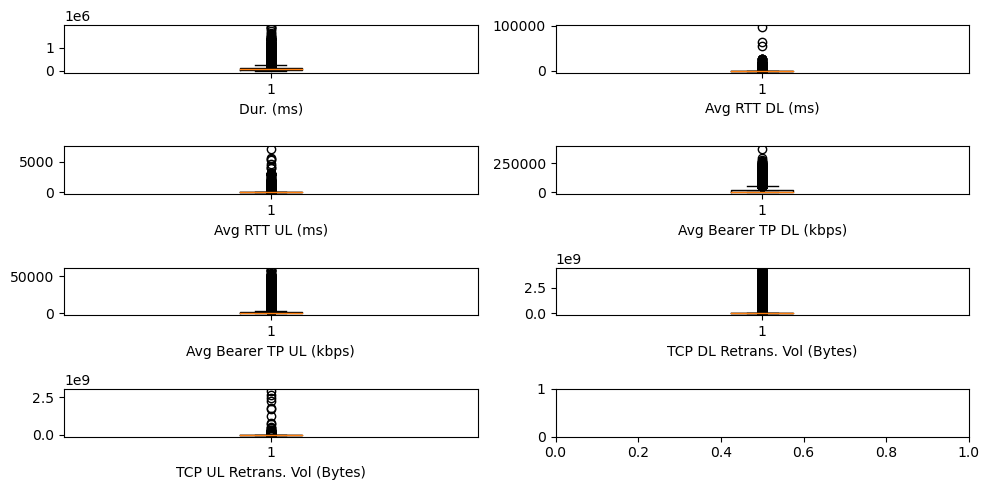

In [10]:
# using boxplot to see the distribution
columns = experience.select_dtypes(include=np.number).columns
fig, axs = plt.subplots(4,2,figsize = (10,5))
axs = axs.flatten()

for i,col in enumerate(columns):
    axs[i].boxplot(experience[col])
    axs[i].set_xlabel(col)
plt.tight_layout()
plt.show()

In [11]:
# remove outliers thus to be done through loop because there are still some outliers left
columns = experience.select_dtypes(include=np.number).columns

for i in range(5):
    for col in columns:
        experience = remove_outliers(experience,col)

## Check

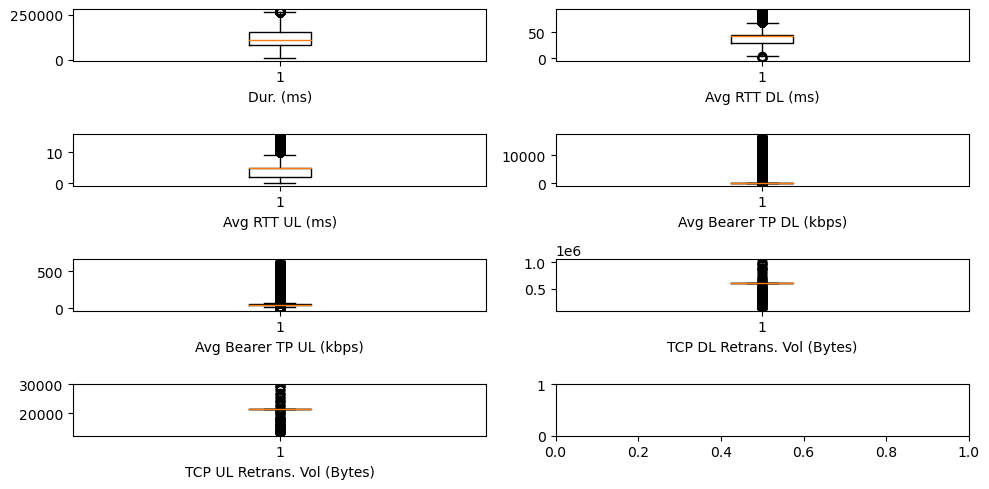

In [12]:
fig, axs = plt.subplots(4,2,figsize = (10,5))
axs = axs.flatten()

for i,col in enumerate(columns):
    axs[i].boxplot(experience[col])
    axs[i].set_xlabel(col)
plt.tight_layout()
plt.show()

In [13]:
# the shape of experience after preprocessing
experience.shape

(70207, 9)

In [14]:
experience.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70207 entries, 80 to 149999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   MSISDN/Number                70207 non-null  object 
 1   Handset Type                 70207 non-null  object 
 2   Dur. (ms)                    70207 non-null  float64
 3   Avg RTT DL (ms)              70207 non-null  float64
 4   Avg RTT UL (ms)              70207 non-null  float64
 5   Avg Bearer TP DL (kbps)      70207 non-null  float64
 6   Avg Bearer TP UL (kbps)      70207 non-null  float64
 7   TCP DL Retrans. Vol (Bytes)  70207 non-null  float64
 8   TCP UL Retrans. Vol (Bytes)  70207 non-null  float64
dtypes: float64(7), object(2)
memory usage: 5.4+ MB


## Task 3.1

In [15]:
experience_per_customer = experience.groupby(['MSISDN/Number','Handset Type']).apply(
    lambda x: pd.Series({
        'Dur. (ms)': x['Dur. (ms)'].mean(),
        'Avg RTT DL (ms)': np.average(x['Avg RTT DL (ms)'], weights = x['Dur. (ms)']),
        'Avg RTT UL (ms)': np.average(x['Avg RTT UL (ms)'], weights = x['Dur. (ms)']),
        'Avg Bearer TP DL (kbps)': np.average(x['Avg Bearer TP DL (kbps)'], weights = x['Dur. (ms)']),
        'Avg Bearer TP UL (kbps)': np.average(x['Avg Bearer TP UL (kbps)'], weights = x['Dur. (ms)']),
        'TCP DL Retrans. Vol (Bytes)': np.average(x['TCP DL Retrans. Vol (Bytes)'], weights = x['Dur. (ms)']),
        'TCP UL Retrans. Vol (Bytes)': np.average(x['TCP UL Retrans. Vol (Bytes)'], weights = x['Dur. (ms)']),
    })
).reset_index()

In [16]:
experience_per_customer.head()

,MSISDN/Number,Handset Type,Dur. (ms),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes)
0,33601001722.0,Huawei P20 Lite Huawei Nova 3E,116720.0,46.0,0.0,37.0,39.0,614061.0,21515.5
1,33601001754.0,Apple iPhone 7 (A1778),181230.0,30.0,1.0,48.0,51.0,614061.0,21515.5
2,33601008617.0,Apple iPhone Se (A1723),18549.0,28.0,0.0,23.0,40.0,614061.0,21515.5
3,33601010682.0,Samsung Galaxy A8 (2018),125895.0,45.0,5.0,59.0,62.0,614061.0,21515.5
4,33601011634.0,Huawei Mate 10 Pro Porsche Design Huawei Mate 10,64180.0,14.0,0.0,50.0,47.0,614061.0,21515.5


## Task 3.2

In [17]:
experience_per_customer.shape

(59819, 9)

In [18]:
# create the new dataframe
general_experience = create_dataframe_DLUL(experience_per_customer)

# rearrange the order of the columns
new_order = ['MSISDN/Number', 'Handset Type', 'Dur. (ms)', 'Avg RTT DL/UL', 'Avg Bearer TP DL/UL', 'TCP DL/UL']
general_experience = general_experience[new_order]

In [19]:
general_experience.head()

,MSISDN/Number,Handset Type,Dur. (ms),Avg RTT DL/UL,Avg Bearer TP DL/UL,TCP DL/UL
0,33601001722.0,Huawei P20 Lite Huawei Nova 3E,116720.0,23.0,38.0,317788.25
1,33601001754.0,Apple iPhone 7 (A1778),181230.0,15.5,49.5,317788.25
2,33601008617.0,Apple iPhone Se (A1723),18549.0,14.0,31.5,317788.25
3,33601010682.0,Samsung Galaxy A8 (2018),125895.0,25.0,60.5,317788.25
4,33601011634.0,Huawei Mate 10 Pro Porsche Design Huawei Mate 10,64180.0,7.0,48.5,317788.25


In [20]:
print(general_experience.shape)
general_experience.info()

(59819, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59819 entries, 0 to 59818
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MSISDN/Number        59819 non-null  object 
 1   Handset Type         59819 non-null  object 
 2   Dur. (ms)            59819 non-null  float64
 3   Avg RTT DL/UL        59819 non-null  float64
 4   Avg Bearer TP DL/UL  59819 non-null  float64
 5   TCP DL/UL            59819 non-null  float64
dtypes: float64(4), object(2)
memory usage: 2.7+ MB


In [21]:
general_experience.columns

Index(['MSISDN/Number', 'Handset Type', 'Dur. (ms)', 'Avg RTT DL/UL',
       'Avg Bearer TP DL/UL', 'TCP DL/UL'],
      dtype='object')

In [22]:
# top network metrics
ntw_metrics = ['Avg RTT DL/UL','Avg Bearer TP DL/UL','TCP DL/UL']

for n in ntw_metrics:
    print(f"Top 10 {n} values")
    print(f"{general_experience[['MSISDN/Number',n]].sort_values(by = n,ascending = False).head(10)}\n")

Top 10 Avg RTT DL/UL values
       MSISDN/Number  Avg RTT DL/UL
5868   33619582072.0           53.0
21672  33659621134.0           52.0
37840  33668028751.0           50.0
21064  33659329255.0           50.0
30731  33663720697.0           50.0
21960  33659751486.0           49.5
23174  33660326387.0           49.5
34032  33665477681.0           49.5
36409  33667096941.0           49.5
45523  33685455809.0           49.0

Top 10 Avg Bearer TP DL/UL values
       MSISDN/Number  Avg Bearer TP DL/UL
43949  33680268692.0               8499.0
33894  33665396124.0               8495.5
34613  33665915030.0               8491.0
11532  33635549656.0               8488.5
7165   33622732710.0               8445.5
46537  33688808462.0               8417.0
30711  33663713503.0               8407.5
56294  33768379610.0               8403.0
10804  33633171295.0               8378.5
32848  33664830157.0               8360.0

Top 10 TCP DL/UL values
       MSISDN/Number  TCP DL/UL
1170   33607212604.0  

In [23]:
# bottom network metrics
ntw_metrics = ['Avg RTT DL/UL','Avg Bearer TP DL/UL','TCP DL/UL']

for n in ntw_metrics:
    print(n)
    print(f"Bottom 10 {n} values")
    print(f"{general_experience[['MSISDN/Number',n]].sort_values(by = n,ascending = False).tail(10)}\n")

Avg RTT DL/UL
Bottom 10 Avg RTT DL/UL values
       MSISDN/Number  Avg RTT DL/UL
1831   33609260285.0       4.204419
13928  33647679481.0       4.000000
37506  33667788444.0       3.500000
38777  33668619895.0       3.000000
54375  33762276597.0       3.000000
21399  33659493541.0       2.500000
2807   33611712566.0       2.000000
22907  33660204450.0       1.000000
25905  33661575382.0       0.000000
17926  33652982188.0       0.000000

Avg Bearer TP DL/UL
Bottom 10 Avg Bearer TP DL/UL values
       MSISDN/Number  Avg Bearer TP DL/UL
12419  33641506669.0                  0.0
46556  33688862447.0                  0.0
36103  33666914765.0                  0.0
29883  33663320217.0                  0.0
40959  33670644941.0                  0.0
1828   33609245815.0                  0.0
47931  33698388382.0                  0.0
48750  33698865655.0                  0.0
27298  33662164716.0                  0.0
14478  33649848728.0                  0.0

TCP DL/UL
Bottom 10 TCP DL/UL values
 

In [24]:
# top network metrics

print(f"{general_experience[['MSISDN/Number','TCP DL/UL']].sort_values(by = 'TCP DL/UL',ascending = False).head(10)}\n")

       MSISDN/Number  TCP DL/UL
1170   33607212604.0  510706.00
2748   33611587488.0  504843.25
29082  33662947066.0  501805.75
27533  33662269701.0  489165.00
48300  33698622511.0  488887.75
9451   33628716098.0  485571.00
19872  33658820950.0  474487.25
53971  33761905065.0  456758.75
57309  33771945898.0  445054.50
17728  33652557319.0  420358.75



- The RTT value from the top 10 to the top bottom starts to decrease efficiently which is good because RTT is latency measurement therefore lower RTT indicates better performances.

- The users in the top 10 Bearer TP have a higher values which indicated that their data transmission is fast. The bottom 10 users have 0 values this shows a very poor connection or no data transmission over the network.

- Bottom 10 values of TCP, these users have moderate to low TCP DL/UL values, indicating lower engagement or slower download/upload speeds. This could mean these users are not utilizing their network bandwidth effectively.

- Top 10 values of TCP, these users are transferring vast amounts of data over TCP, indicating very high engagement and effective use of the network. They likely represent the most engaged or heavy users of the network.

In [25]:
# most frequent values of the network metrics
ntw_metrics = ['Avg RTT DL/UL','Avg Bearer TP DL/UL','TCP DL/UL']

for n in ntw_metrics:
    print(f"Frequent {n} values")
    print(f"{general_experience[n].value_counts().index[0]} : {general_experience[n].value_counts().values[0]}\n")

Frequent Avg RTT DL/UL values
25.0 : 19164

Frequent Avg Bearer TP DL/UL values
31.5 : 2481

Frequent TCP DL/UL values
317788.25 : 59542



- The frequent RTT value of 25 ms suggests a moderate network delay for the users, meaning some latency in round-trip communication.
- The 31.5 kbps average throughput indicates that there might be periods of low data transmission on some bearer channels.
- However, the TCP throughput value of 317788.25 kbps is relatively high, indicating that in many cases, users experienced fast data transfer speeds.

In [26]:
# further check how many users face Avg Bearer TP DL/UL of zero
print(general_experience[general_experience['Avg Bearer TP DL/UL'] == 0].count())

print(general_experience[general_experience['TCP DL/UL'] == 317788.25].count())

MSISDN/Number          150
Handset Type           150
Dur. (ms)              150
Avg RTT DL/UL          150
Avg Bearer TP DL/UL    150
TCP DL/UL              150
dtype: int64
MSISDN/Number          59542
Handset Type           59542
Dur. (ms)              59542
Avg RTT DL/UL          59542
Avg Bearer TP DL/UL    59542
TCP DL/UL              59542
dtype: int64


The top 20 Handset type: Handset Type
Qingdao Hisense. Hisense F24                  8050.000000
Lenovo Al12492145                             7049.500000
Asustek Zenfone 4 Selfie Pro                  6910.000000
Wiko Global Sasu Wiko Sunny2 Plus             6181.500000
Huawei Plk-L01                                5604.500000
Sony Mobile Comm. Xperia Xz                   5388.500000
Lenovo Moto G With 4G Motorola M0Fa8          5200.750000
Rainbow Communic. C45                         5022.500000
Asustek Asus Zenfone Live Zb501Kl             4912.750000
Xiaomi Communica. M1808D2Tg                   4795.000000
Wiko Global Sasu Wiko View                    4393.500000
Samsung Galaxy J7 Prime Duos (Sm-G610F Ds)    4370.250000
Samsung Galaxy Tab A (Sm-T585)                3998.500000
Lenovo Nexus 6 Valocia                        3989.000000
Hmd Global Oy Nokia 2 Ds                      3952.000000
Sony Mobile Comm. Xperia X                    3762.500000
Asustek Asus Zenfone Max Zc550Kl  

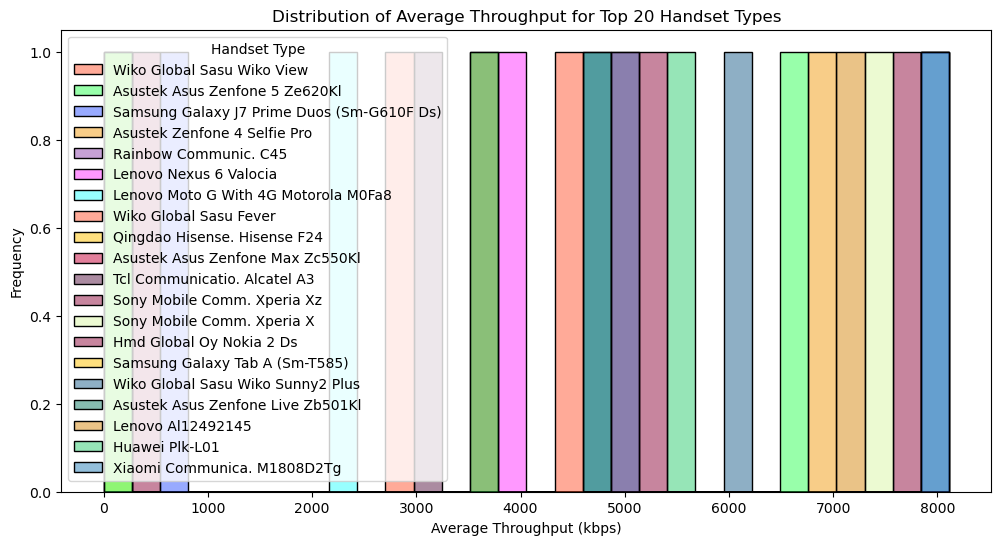

In [27]:
# top 20 handset types and their dispersion plot
dispersion_per_handsetType(general_experience,'Avg Bearer TP DL/UL')

- These are the top 20 handset types that provides the highest average throughput to the users, although this aren't in the top 10 most handset types used by the customers.

- In the plot above the frequency count is 1 for each type. Here we can get the insight that the number of device that fall in the Avg Bearer TP DL/UL range of that handset type is only one. 

- Therefore the top 10 handset types used by the customer don't have by average the highest average throughput thus users using those handset types have very poor connection or no data transmission over the network

The top 20 Handset type: Handset Type
Wiko Global Sasu Wiko Lenny3         414618.750000
Tcl Communicatio. U3 3G              340566.916667
Shenzhen Boway E. Boway Boway U11    336745.000000
Huawei E5372S-32                     334801.916667
Huawei Y6 2017 Huawei Nova Young     327417.050000
Samsung Galaxy A5 (Sm-A500X)         327137.000000
D-Link Corporati. D-Link Dwr-921     319059.375000
Huawei Mrd-Lx1                       318805.000000
Apple iPhone Se (A1662)              318438.141949
Huawei P20 Lite Huawei Nova 3E       317934.312723
Apple iPhone 6 Plus (A1524)          317855.663851
Apple iPhone 7 (A1778)               317790.783082
Rim Blackberry 9720                  317788.250000
Rim Blackberry 9300                  317788.250000
Rainbow Communic. C45                317788.250000
Samsung Galaxy Ace (Gt-S5839I)       317788.250000
Samsung Galaxy A9 2018               317788.250000
Samsung Galaxy A6                    317788.250000
Samsung Galaxy A5 (Sm-A510X)         317788.

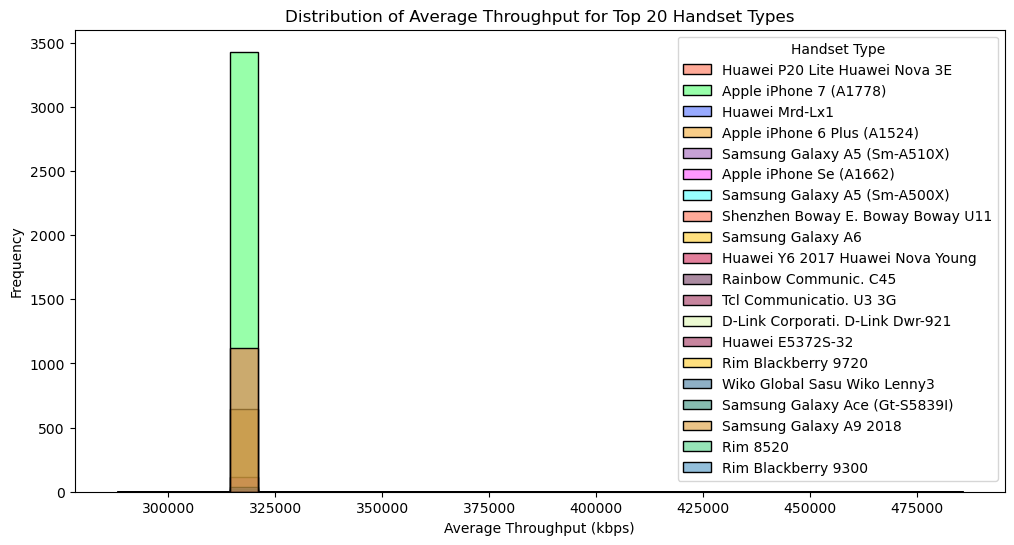

In [28]:
dispersion_per_handsetType(general_experience,'TCP DL/UL')

- All the top 20 handset types fall in the same TCP range.
- Here the top 3 handset manufactures are present therefore it can be understood that this users experience a fast data transfer speeds.

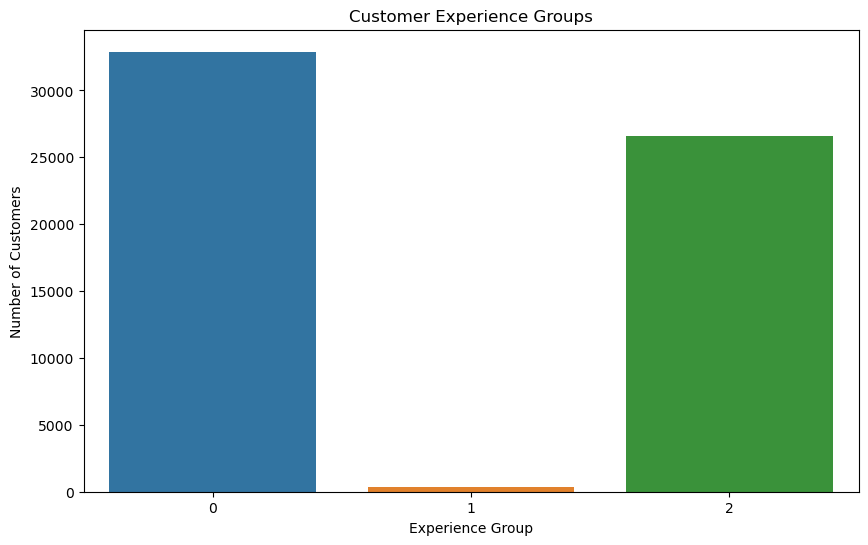

In [29]:
# users experience classififcation using k-means
scaler = StandardScaler()
normalized_data = scaler.fit_transform(general_experience[['Avg RTT DL/UL', 'Avg Bearer TP DL/UL', 'TCP DL/UL']])

kmeans = KMeans(n_clusters = 3, random_state = 42)
general_experience['experience_classification'] = kmeans.fit_predict(normalized_data)

# plot the number of engagements
plt.figure(figsize=(10, 6))
sns.countplot(x='experience_classification', data=general_experience)
plt.title('Customer Experience Groups')
plt.xlabel('Experience Group')
plt.ylabel('Number of Customers')
plt.show()

- The customer experience is the extreme ends, there is a very small number of users in the middle group.
- Group 0 customers are much larger than Group 2 customers.

In [30]:
# which metrics influence the user experience?
def experience_metric_stat(df,col,n):
    print(f"The maximum value of {col} in Group {n} users: {df[df['experience_classification'] == n][col].max()}")   
    print(f"The minimum value of {col} in Group {n} users: {df[df['experience_classification'] == n][col].min()}")
    print('\n')

In [31]:
# The maximum and minimum value of the network metric(experience metric) per group
network_metric_columns = ['Avg RTT DL/UL', 'Avg Bearer TP DL/UL', 'TCP DL/UL']

for ntw in network_metric_columns:
    for i in range(3):
        experience_metric_stat(general_experience,ntw,i)

The maximum value of Avg RTT DL/UL in Group 0 users: 53.0
The minimum value of Avg RTT DL/UL in Group 0 users: 21.1383937848682


The maximum value of Avg RTT DL/UL in Group 1 users: 49.5
The minimum value of Avg RTT DL/UL in Group 1 users: 10.232525186196408


The maximum value of Avg RTT DL/UL in Group 2 users: 21.250044651362167
The minimum value of Avg RTT DL/UL in Group 2 users: 0.0


The maximum value of Avg Bearer TP DL/UL in Group 0 users: 7365.0
The minimum value of Avg Bearer TP DL/UL in Group 0 users: 0.0


The maximum value of Avg Bearer TP DL/UL in Group 1 users: 8499.0
The minimum value of Avg Bearer TP DL/UL in Group 1 users: 59.5


The maximum value of Avg Bearer TP DL/UL in Group 2 users: 3673.0
The minimum value of Avg Bearer TP DL/UL in Group 2 users: 0.5


The maximum value of TCP DL/UL in Group 0 users: 510706.0
The minimum value of TCP DL/UL in Group 0 users: 234531.90607355442


The maximum value of TCP DL/UL in Group 1 users: 394475.5
The minimum value of TCP DL

- A lot of our customer which are in group 0 are the most engaged users.

- The second group 2 in the number of users also have a good range of TCP and there minimum RTT values falls down to 0 thus they have effectively uses the network.

- Group 1 have the most small number of users also looking at their network metric values they have a low engagement but a fast data transmission than the other two groups.